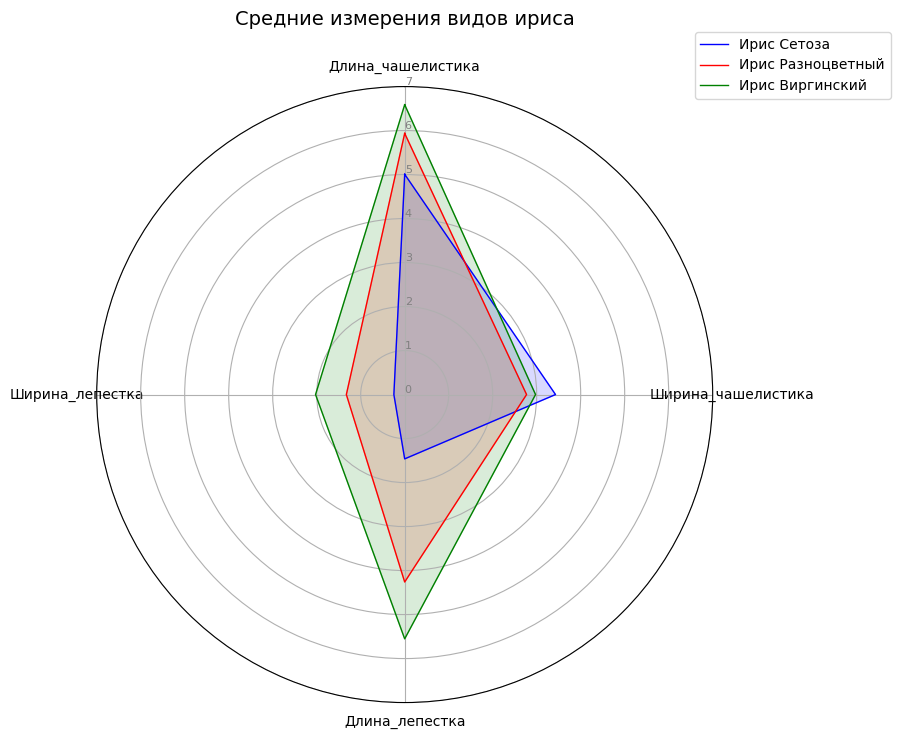

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Use feature names as categories and translate to Russian
categories = [
    'Длина_чашелистика',
    'Ширина_чашелистика',
    'Длина_лепестка',
    'Ширина_лепестка'
]

# Number of variables
num_vars = len(categories)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Complete the loop for angles
angles = angles + angles[:1]

# Create the figure and a polar axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Define species names in Russian and colors
species_names_ru = {
    'setosa': 'Ирис Сетоза',
    'versicolor': 'Ирис Разноцветный',
    'virginica': 'Ирис Виргинский'
}
colors = ['blue', 'red', 'green'] # Different colors for each species

# Loop through each species and plot its average values
for i, species_name_en in enumerate(iris.target_names):
    species_data = iris.data[iris.target == i]
    average_values = np.mean(species_data, axis=0).tolist()
    # Complete the loop for values
    average_values = average_values + average_values[:1]

    # Plot the data for the current species
    ax.plot(angles, average_values, color=colors[i], linewidth=1, linestyle='solid', label=species_names_ru[species_name_en])
    ax.fill(angles, average_values, color=colors[i], alpha=0.15)

# Add the attribute labels to the outer edge.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Draw ylabels (value labels).
ax.set_rlabel_position(0) # Move radial labels away from plotted line

# Set upper limit for y-axis to 7 as requested by the user
upper_limit = 7.0

y_ticks = np.arange(0, upper_limit + 1, 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels([str(int(i)) for i in y_ticks], color="grey", size=8)
ax.set_ylim(0, upper_limit) # Set maximum y-axis limit to 7

# Add a title, translated to Russian and adjusted vertical position
ax.set_title('Средние измерения видов ириса', va='bottom', y=1.08, fontsize=14)

# Add a legend to distinguish species
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

In [3]:
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset('penguins')

print("Датасет пингвинов загружен. Первые 5 строк:")
print(penguins_df.head())
print(f"\nРазмерность датасета: {penguins_df.shape}")

Датасет пингвинов загружен. Первые 5 строк:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Размерность датасета: (344, 7)


**Reasoning**:
The first step is to create a list of the numerical features as specified in the instructions and then to filter out any rows with missing values in these features from the `penguins_df` DataFrame, storing the result in `penguins_cleaned_df`. This ensures that we work with a clean dataset for further analysis.



In [4]:
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_cleaned_df = penguins_df.dropna(subset=numerical_features).copy()

print("Original DataFrame head:")
print(penguins_df.head())
print("\nCleaned DataFrame head (after dropping NaNs in numerical features):")
print(penguins_cleaned_df.head())
print(f"\nNumber of rows before cleaning: {len(penguins_df)}")
print(f"Number of rows after cleaning: {len(penguins_cleaned_df)}")

Original DataFrame head:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Cleaned DataFrame head (after dropping NaNs in numerical features):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torg

**Reasoning**:
Now that the numerical features have been identified and missing values handled, the next step is to translate these feature names into Russian as specified in the instructions and rename the columns in the `penguins_cleaned_df` DataFrame. This prepares the data for subsequent steps where plots will use these translated names.



In [5]:
feature_name_translations = {
    'bill_length_mm': 'Длина клюва (мм)',
    'bill_depth_mm': 'Глубина клюва (мм)',
    'flipper_length_mm': 'Длина ласты (мм)',
    'body_mass_g': 'Масса тела (г)'
}
penguins_cleaned_df = penguins_cleaned_df.rename(columns=feature_name_translations)

print("DataFrame head with translated feature names:")
print(penguins_cleaned_df.head())
print("\nUpdated columns:")
print(penguins_cleaned_df.columns.tolist())


DataFrame head with translated feature names:
  species     island  Длина клюва (мм)  Глубина клюва (мм)  Длина ласты (мм)  \
0  Adelie  Torgersen              39.1                18.7             181.0   
1  Adelie  Torgersen              39.5                17.4             186.0   
2  Adelie  Torgersen              40.3                18.0             195.0   
4  Adelie  Torgersen              36.7                19.3             193.0   
5  Adelie  Torgersen              39.3                20.6             190.0   

   Масса тела (г)     sex  
0          3750.0    Male  
1          3800.0  Female  
2          3250.0  Female  
4          3450.0  Female  
5          3650.0    Male  

Updated columns:
['species', 'island', 'Длина клюва (мм)', 'Глубина клюва (мм)', 'Длина ласты (мм)', 'Масса тела (г)', 'sex']


## Normalize Features

### Subtask:
Normalize the identified numerical features of the `penguins_cleaned_df` using `MinMaxScaler` to scale them to a range (e.g., 0 to 1), ensuring all features contribute equally to the radar charts after scaling.


In [6]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Identify the translated numerical features
translated_numerical_features = [
    'Длина клюва (мм)',
    'Глубина клюва (мм)',
    'Длина ласты (мм)',
    'Масса тела (г)'
]

# Apply MinMaxScaler to the numerical features
penguins_scaled = scaler.fit_transform(penguins_cleaned_df[translated_numerical_features])

# Create a new DataFrame with scaled features and non-numerical columns
penguins_scaled_df = penguins_cleaned_df[['species', 'island']].copy()
penguins_scaled_df[translated_numerical_features] = penguins_scaled

print("Original (cleaned) DataFrame head:")
print(penguins_cleaned_df.head())
print("\nScaled DataFrame head:")
print(penguins_scaled_df.head())
print("\nDescriptive statistics for scaled numerical features:")
print(penguins_scaled_df[translated_numerical_features].describe())

Original (cleaned) DataFrame head:
  species     island  Длина клюва (мм)  Глубина клюва (мм)  Длина ласты (мм)  \
0  Adelie  Torgersen              39.1                18.7             181.0   
1  Adelie  Torgersen              39.5                17.4             186.0   
2  Adelie  Torgersen              40.3                18.0             195.0   
4  Adelie  Torgersen              36.7                19.3             193.0   
5  Adelie  Torgersen              39.3                20.6             190.0   

   Масса тела (г)     sex  
0          3750.0    Male  
1          3800.0  Female  
2          3250.0  Female  
4          3450.0  Female  
5          3650.0    Male  

Scaled DataFrame head:
  species     island  Длина клюва (мм)  Глубина клюва (мм)  Длина ласты (мм)  \
0  Adelie  Torgersen          0.254545            0.666667          0.152542   
1  Adelie  Torgersen          0.269091            0.511905          0.237288   
2  Adelie  Torgersen          0.298182            0.

**Reasoning**:
Now that the numerical features are normalized, the next step is to calculate the average normalized measurements for each penguin species. This data will be used to generate the first radar chart as specified in the main task, which requires visualizing average measurements per species.



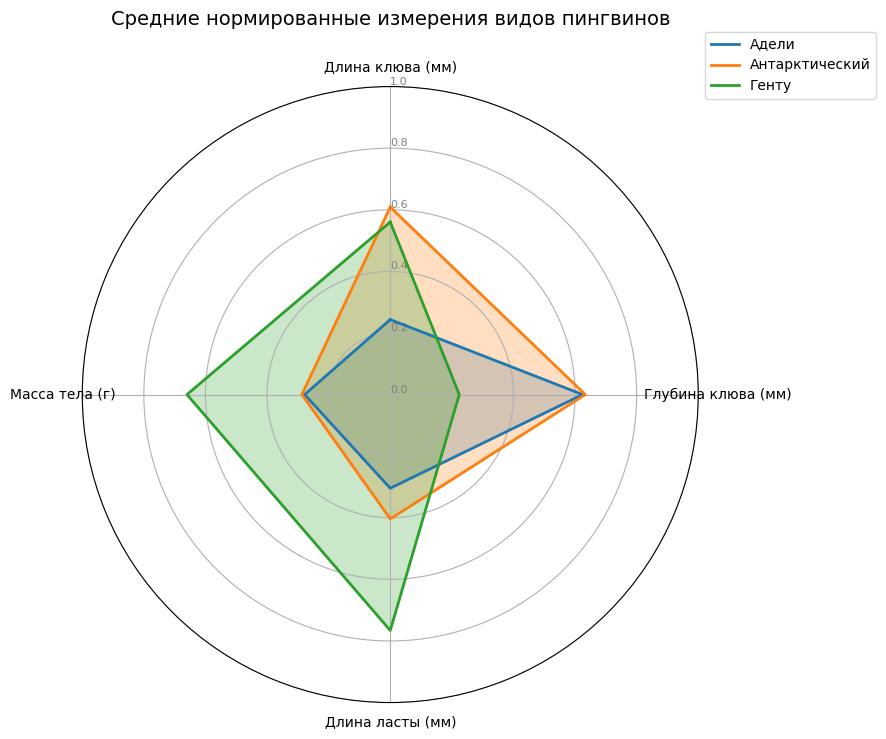

Radar chart showing average normalized measurements for each penguin species displayed.


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average normalized measurements for each species
avg_species_scaled_measurements = penguins_scaled_df.groupby('species')[translated_numerical_features].mean()

# Prepare data for plotting
num_vars = len(translated_numerical_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Complete the loop

# Define species names in Russian and colors
species_name_ru_map = {
    'Adelie': 'Адели',
    'Chinstrap': 'Антарктический',
    'Gentoo': 'Генту'
}
species_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Different colors for each species

# Create the figure and a polar axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop through each species and plot its average normalized values
for i, species_en in enumerate(avg_species_scaled_measurements.index):
    species_ru = species_name_ru_map.get(species_en, species_en)
    values = avg_species_scaled_measurements.loc[species_en].tolist()
    values += values[:1] # Complete the loop for values

    ax.plot(angles, values, color=species_colors[i], linewidth=2, linestyle='solid', label=species_ru)
    ax.fill(angles, values, color=species_colors[i], alpha=0.25)

# Add the attribute labels to the outer edge.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(translated_numerical_features, fontsize=10)

# Draw ylabels (value labels).
ax.set_rlabel_position(0) # Move radial labels away from plotted line

# Set y-axis limits from 0 to 1 as requested
ax.set_ylim(0, 1)
y_ticks = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.1f}' for i in y_ticks], color="grey", size=8)

# Add a title, translated to Russian
ax.set_title('Средние нормированные измерения видов пингвинов', va='bottom', y=1.08, fontsize=14)

# Add a legend to distinguish species
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()
print("Radar chart showing average normalized measurements for each penguin species displayed.")

**Reasoning**:
Now that the radar chart for species is generated, the next step is to calculate the average normalized measurements for each island to prepare for the second radar chart, as specified in the main task.



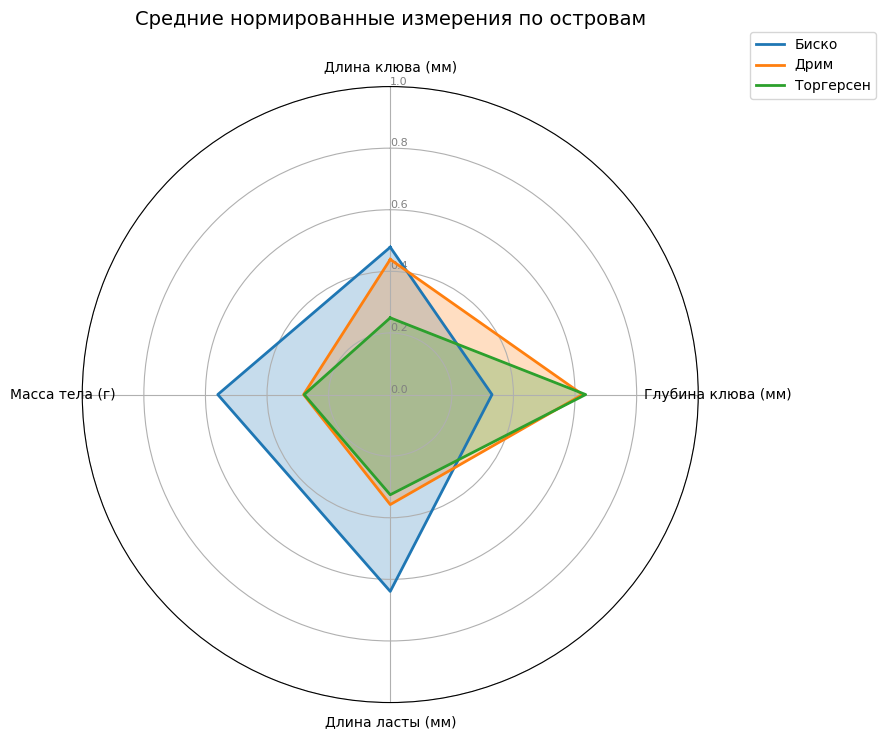

Radar chart showing average normalized measurements for each island displayed.


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average normalized measurements for each island
avg_island_scaled_measurements = penguins_scaled_df.groupby('island')[translated_numerical_features].mean()

# Prepare data for plotting
num_vars = len(translated_numerical_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Complete the loop

# Define island names in Russian and colors
island_name_ru_map = {
    'Torgersen': 'Торгерсен',
    'Biscoe': 'Биско',
    'Dream': 'Дрим'
}
island_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Different colors for each island

# Create the figure and a polar axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop through each island and plot its average normalized values
for i, island_en in enumerate(avg_island_scaled_measurements.index):
    island_ru = island_name_ru_map.get(island_en, island_en)
    values = avg_island_scaled_measurements.loc[island_en].tolist()
    values += values[:1] # Complete the loop for values

    ax.plot(angles, values, color=island_colors[i], linewidth=2, linestyle='solid', label=island_ru)
    ax.fill(angles, values, color=island_colors[i], alpha=0.25)

# Add the attribute labels to the outer edge.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(translated_numerical_features, fontsize=10)

# Draw ylabels (value labels).
ax.set_rlabel_position(0) # Move radial labels away from plotted line

# Set y-axis limits from 0 to 1 as requested
ax.set_ylim(0, 1)
y_ticks = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.1f}' for i in y_ticks], color="grey", size=8)

# Add a title, translated to Russian
ax.set_title('Средние нормированные измерения по островам', va='bottom', y=1.08, fontsize=14)

# Add a legend to distinguish islands
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()
print("Radar chart showing average normalized measurements for each island displayed.")

In [9]:
from sklearn.datasets import load_iris
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Original feature names
original_feature_names = iris.feature_names

# Translate feature names to Russian
feature_name_translations = {
    'sepal length (cm)': 'Длина чашелистика',
    'sepal width (cm)': 'Ширина чашелистика',
    'petal length (cm)': 'Длина лепестка',
    'petal width (cm)': 'Ширина лепестка'
}

# Create a new list of translated feature names
feature_names_ru = [feature_name_translations[name] for name in original_feature_names]

# Translate target names (species names) to Russian for the legend
species_names_ru_dict = {
    'setosa': 'Ирис Сетоза',
    'versicolor': 'Ирис Разноцветный',
    'virginica': 'Ирис Виргинский'
}
# Create a list of translated target names in the correct order
target_names_ru = [species_names_ru_dict[name] for name in iris.target_names]

# Create a figure and axes explicitly for more control
fig, ax = plt.subplots(figsize=(8, 5.5)) # Yellowbrick often uses this default size

# Create the RadViz visualizer, passing the axes to its constructor and translated feature names and target names
visualizer = RadViz(ax=ax, classes=target_names_ru, features=feature_names_ru)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Draw the plot onto the specified axes. This will also create a default legend on 'ax'.
visualizer.draw(X, y)

# Now apply the grid to the same axes 'ax'
ax.grid(True, linestyle='--', alpha=0.7, color='gray') # Added linestyle, alpha, and color for visibility

# --- Legend handling to ensure only one, correctly filtered legend ---

# Get ALL handles and labels from the current axes after drawing.
# This might include duplicate labels or labels from internal Yellowbrick components.
all_handles, all_labels = ax.get_legend_handles_labels()

# Filter to get unique labels corresponding to our target species and their first handle
filtered_handles = []
filtered_labels = []
seen_labels = set()

# Iterate through all handles and labels
for handle, label in zip(all_handles, all_labels):
    # Only add if the label is one of our target species and hasn't been added yet
    if label in target_names_ru and label not in seen_labels:
        filtered_handles.append(handle)
        filtered_labels.append(label)
        seen_labels.add(label)
    # Stop if we have found all unique species labels
    if len(filtered_labels) == len(target_names_ru):
        break

# Remove any existing legend (potentially the one created by visualizer.draw())
# This is crucial to avoid duplicates if yellowbrick automatically adds one.
current_legend = ax.get_legend()
if current_legend:
    current_legend.remove()

# Create the legend using the collected filtered handles and labels
# Position it outside the plot area
ax.legend(filtered_handles, filtered_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Set the title (RadViz usually adds one, but we can customize if needed)
# visualizer.set_title('RadViz Plot of Iris Dataset') # Uncomment if you want to set a specific title

# Finally, show the plot
plt.show()

ModuleNotFoundError: No module named 'yellowbrick'

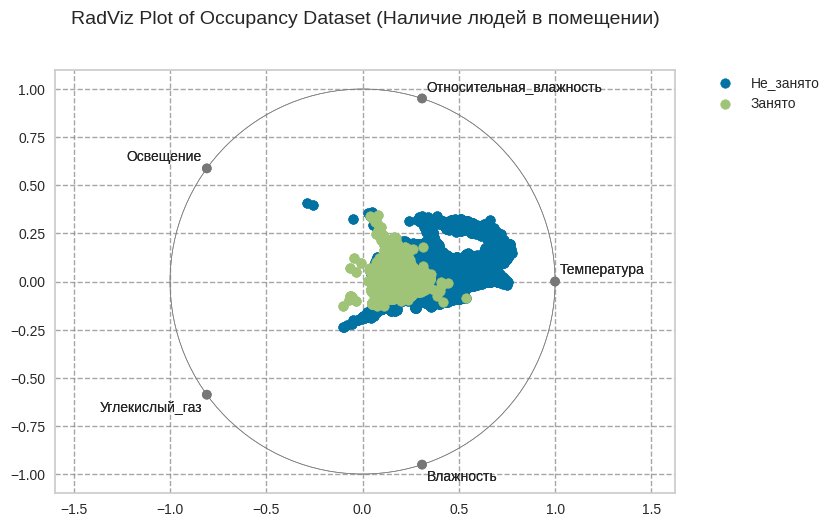

In [ ]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt

# Load the Occupancy dataset
X, y = load_occupancy()
feature_names = X.columns # Extract feature names from the DataFrame

# Translate feature names to Russian
feature_name_translations = {
    'temperature': 'Температура',
    'humidity': 'Влажность',
    'light': 'Освещение',
    'CO2': 'Углекислый_газ', # Corrected key to match 'CO2' from the dataset
    'humidityratio': 'Соотношение_влажности',
    'relative humidity': 'Относительная_влажность'
}
feature_names_ru = [feature_name_translations[name] for name in feature_names]

# Translate target names (classes) to Russian
# The target variable 'y' for occupancy typically has classes 0 and 1.
class_names_ru_dict = {
    0: 'Не_занято',
    1: 'Занято'
}
# Ensure the order of classes matches the internal representation (e.g., from unique values in y)
unique_classes = sorted(y.unique())
target_names_ru = [class_names_ru_dict[c] for c in unique_classes]

# Create a figure and axes explicitly for more control
fig, ax = plt.subplots(figsize=(8, 5.5))

# Create the RadViz visualizer, passing the axes to its constructor and translated feature/class names
visualizer = RadViz(ax=ax, classes=target_names_ru, features=feature_names_ru)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Draw the plot onto the specified axes
visualizer.draw(X, y)

# Apply the grid to the same axes 'ax'
ax.grid(True, linestyle='--', alpha=0.7, color='gray')

# --- Legend handling to ensure only one, correctly filtered legend ---

# Get ALL handles and labels from the current axes after drawing.
all_handles, all_labels = ax.get_legend_handles_labels()

# Filter to get unique labels corresponding to our target classes and their first handle
filtered_handles = []
filtered_labels = []
seen_labels = set()

# Iterate through all handles and labels
for handle, label in zip(all_handles, all_labels):
    # Only add if the label is one of our target classes and hasn't been added yet
    if label in target_names_ru and label not in seen_labels:
        filtered_handles.append(handle)
        filtered_labels.append(label)
        seen_labels.add(label)
    # Stop if we have found all unique class labels
    if len(filtered_labels) == len(target_names_ru):
        break

# Remove any existing legend (potentially the one created by visualizer.draw())
current_legend = ax.get_legend()
if current_legend:
    current_legend.remove()

# Create the legend using the collected filtered handles and labels
# Position it outside the plot area
ax.legend(filtered_handles, filtered_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add a title
ax.set_title('RadViz Plot of Occupancy Dataset (Наличие людей в помещении)', va='bottom', y=1.08, fontsize=14)

# Finally, show the plot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris data
# Use original English feature names for DataFrame creation first
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the original numerical target (species) column for coloring
df_iris['species_id'] = iris.target

# Translate feature names to Russian
feature_name_translations = {
    'sepal length (cm)': 'Длина_чашелистика',
    'sepal width (cm)': 'Ширина_чашелистика',
    'petal length (cm)': 'Длина_лепестка',
    'petal width (cm)': 'Ширина_лепестка'
}

df_iris = df_iris.rename(columns=feature_name_translations)

# Map numerical species IDs to Russian names for the legend labels
species_name_map = {
    0: 'Ирис Сетоза',
    1: 'Ирис Разноцветный',
    2: 'Ирис Виргинский'
}

# Create the parallel coordinates plot using Plotly Express
fig = px.parallel_coordinates(
    df_iris,
    color='species_id', # Use the numerical ID for coloring
    dimensions=list(feature_name_translations.values()), # Use translated feature names for dimensions
    color_continuous_scale=px.colors.sequential.Viridis, # Use a continuous color scale
    title='Параллельные координаты для набора данных Ирисов Фишера'
)

# Update the color axis ticks and labels to show translated species names in the colorbar
fig.update_layout(
    coloraxis_colorbar_tickvals=list(species_name_map.keys()),
    coloraxis_colorbar_ticktext=list(species_name_map.values()),
    coloraxis_colorbar_title='Вид Ириса' # Title for the colorbar
)

# Show the plot
fig.show()

# Task
Calculate the average values of the Iris features for each species from the `df_iris` DataFrame to prepare the input data for Chernoff faces.

## Prepare Data for Chernoff Faces

### Subtask:
Calculate the average values of the Iris features for each species to prepare the input data for Chernoff faces.


**Reasoning**:
The subtask requires calculating the average values of Iris features for each species. I will select the translated numerical feature columns, group the `df_iris` DataFrame by `species_id`, and then compute the mean for each group. The result will be stored in `avg_iris_features_for_chernoff`.



In [ ]:
numerical_features_iris = [
    'Длина_чашелистика',
    'Ширина_чашелистика',
    'Длина_лепестка',
    'Ширина_лепестка'
]

avg_iris_features_for_chernoff = df_iris.groupby('species_id')[numerical_features_iris].mean()

print("Average Iris features for each species (for Chernoff faces):")
print(avg_iris_features_for_chernoff)


Average Iris features for each species (for Chernoff faces):
            Длина_чашелистика  Ширина_чашелистика  Длина_лепестка  \
species_id                                                          
0                       5.006               3.428           1.462   
1                       5.936               2.770           4.260   
2                       6.588               2.974           5.552   

            Ширина_лепестка  
species_id                   
0                     0.246  
1                     1.326  
2                     2.026  


In [ ]:
!pip install ChernoffFace

In [ ]:
from ChernoffFace import ChernoffFace
import numpy
import matplotlib.cm

In [ ]:
# Рассмотрим еще один пример (датасет – данные об арестах в США)
dfData=load_usa_arrests_data_frame()
dfData.head()

,StateName,Murder,Assault,UrbanPopulation,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# Проведем масштабирование
dfData2 = variables_rescale(dfData)
dfData2.head()

,StateName,Murder,Assault,UrbanPopulation,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


In [ ]:
print(normalized_state_features.describe())

          Murder    Assault  UrbanPopulation       Rape
count  50.000000  50.000000        50.000000  50.000000
mean    0.420964   0.430685         0.568475   0.360000
std     0.262380   0.285403         0.245335   0.242025
min     0.000000   0.000000         0.000000   0.000000
25%     0.197289   0.219178         0.381356   0.200904
50%     0.388554   0.390411         0.576271   0.330749
75%     0.629518   0.698630         0.775424   0.487726
max     1.000000   1.000000         1.000000   1.000000


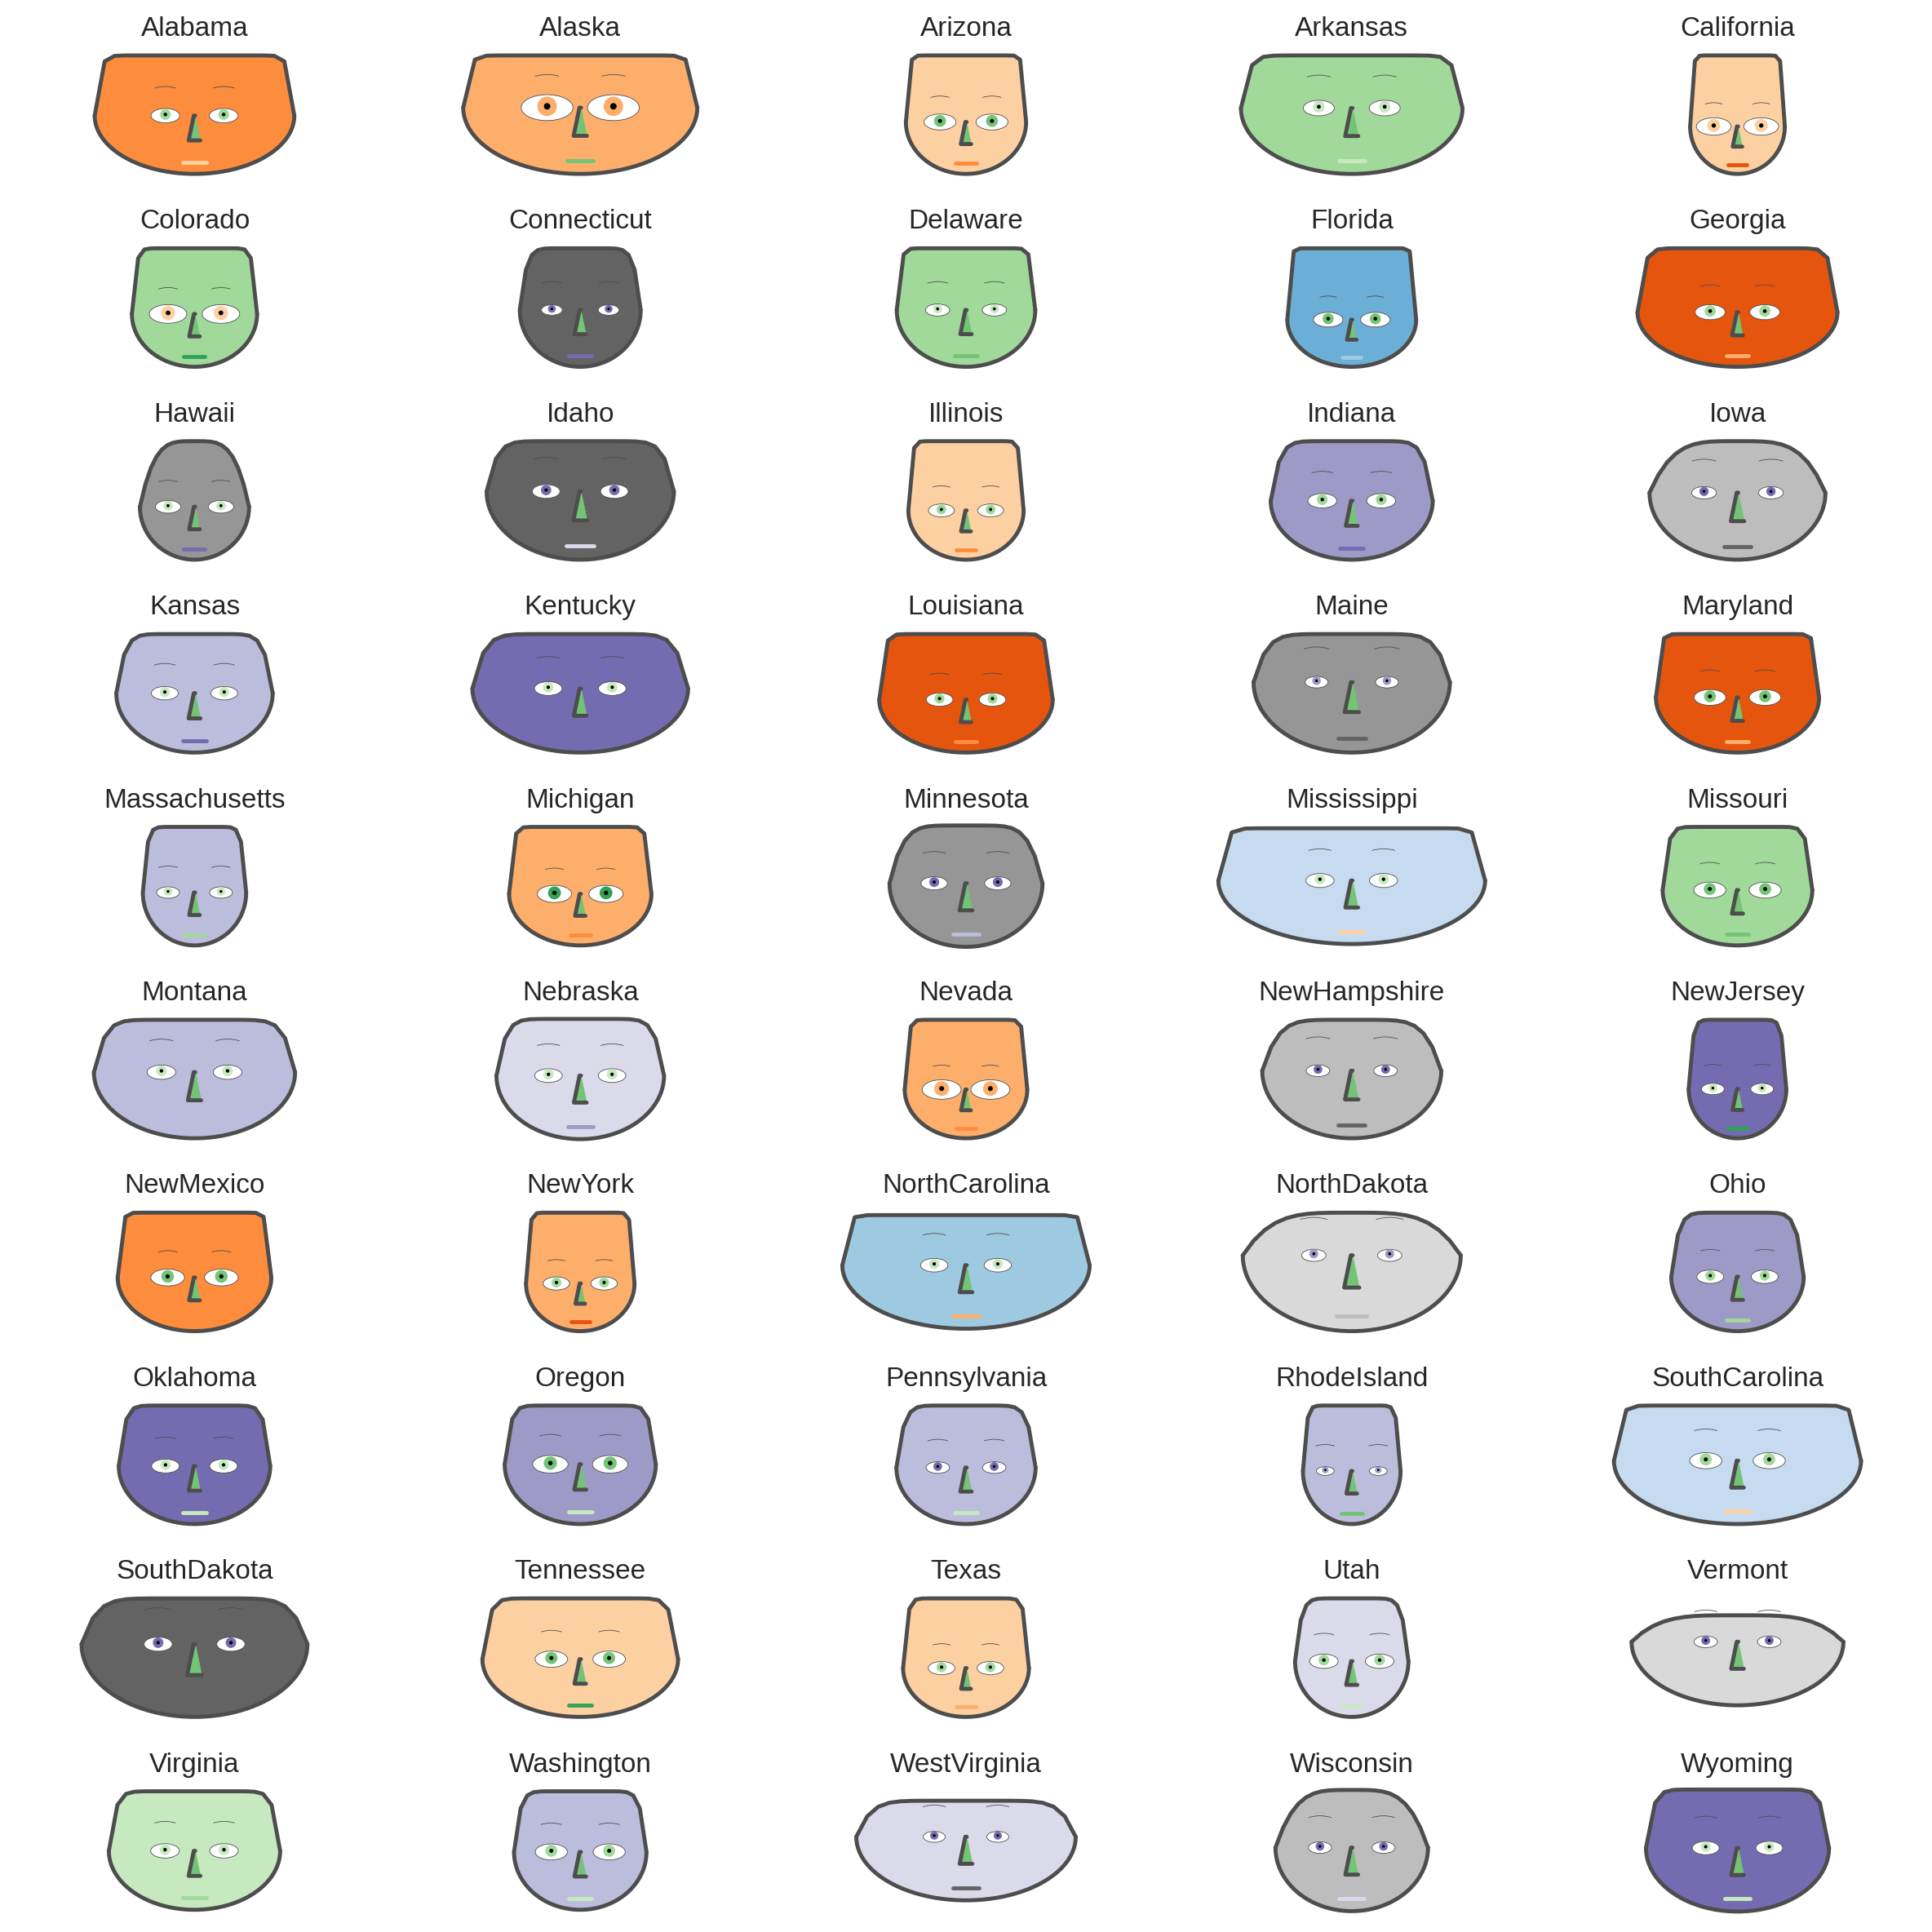

In [ ]:
import warnings

# Suppress all Matplotlib warnings
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", category=UserWarning)

fig = chernoff_face(data=dfData2,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

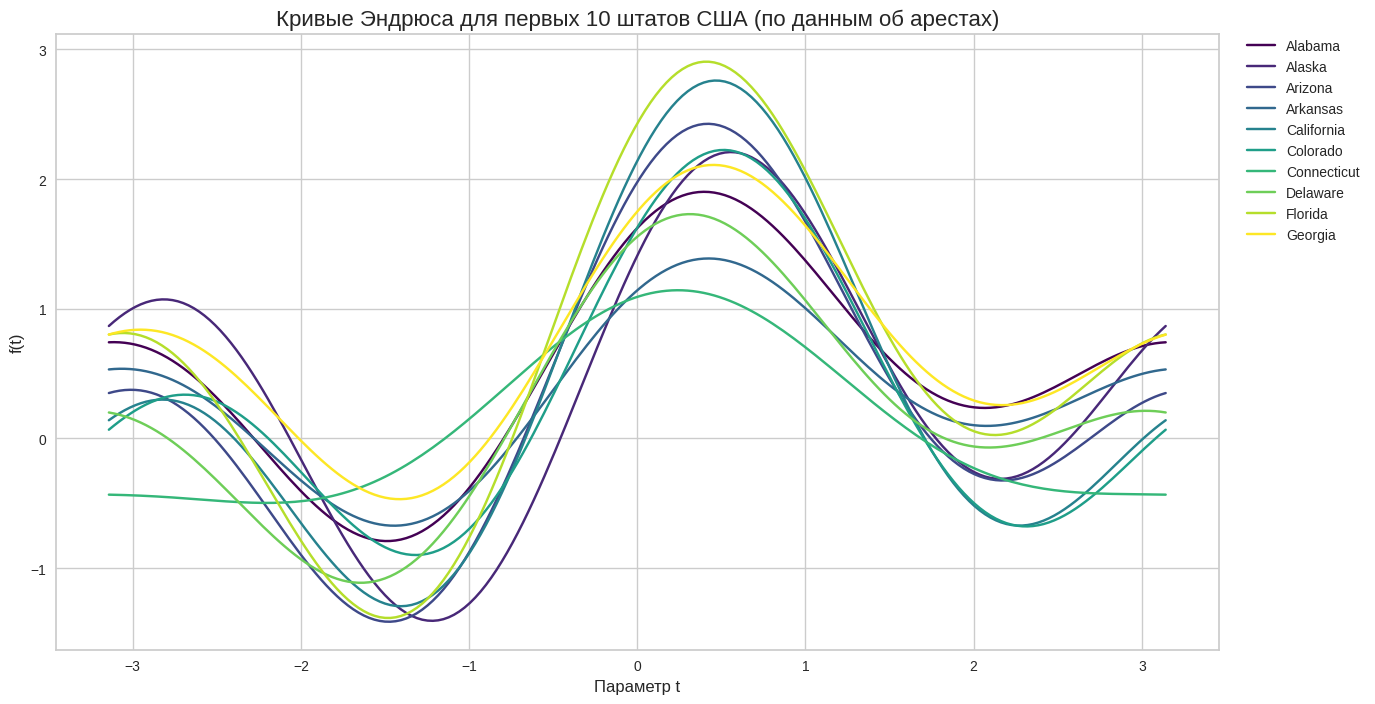

Кривые Эндрюса для первых 10 записей данных об арестах успешно отображены.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import andrews_curves

# Ensure 'StateName' is a column for andrews_curves
# normalized_state_features already has 'StateName' as index, so we reset it
normalized_state_features_with_state_name = normalized_state_features.reset_index()

# Select only the first 10 records for plotting
first_10_states_data = normalized_state_features_with_state_name.head(10)

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot Andrews curves
# The 'class_column' is used to color and group the curves
andrews_curves(first_10_states_data,
               'StateName',
               ax=plt.gca(), # Get the current axes
               colormap='viridis' # Choose a colormap for distinct curves
              )

# Add Russian title and labels
plt.title('Кривые Эндрюса для первых 10 штатов США (по данным об арестах)', fontsize=16)
plt.xlabel('Параметр t', fontsize=12)
plt.ylabel('f(t)', fontsize=12)

# Move the legend outside the plot area for better visibility
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

print("Кривые Эндрюса для первых 10 записей данных об арестах успешно отображены.")

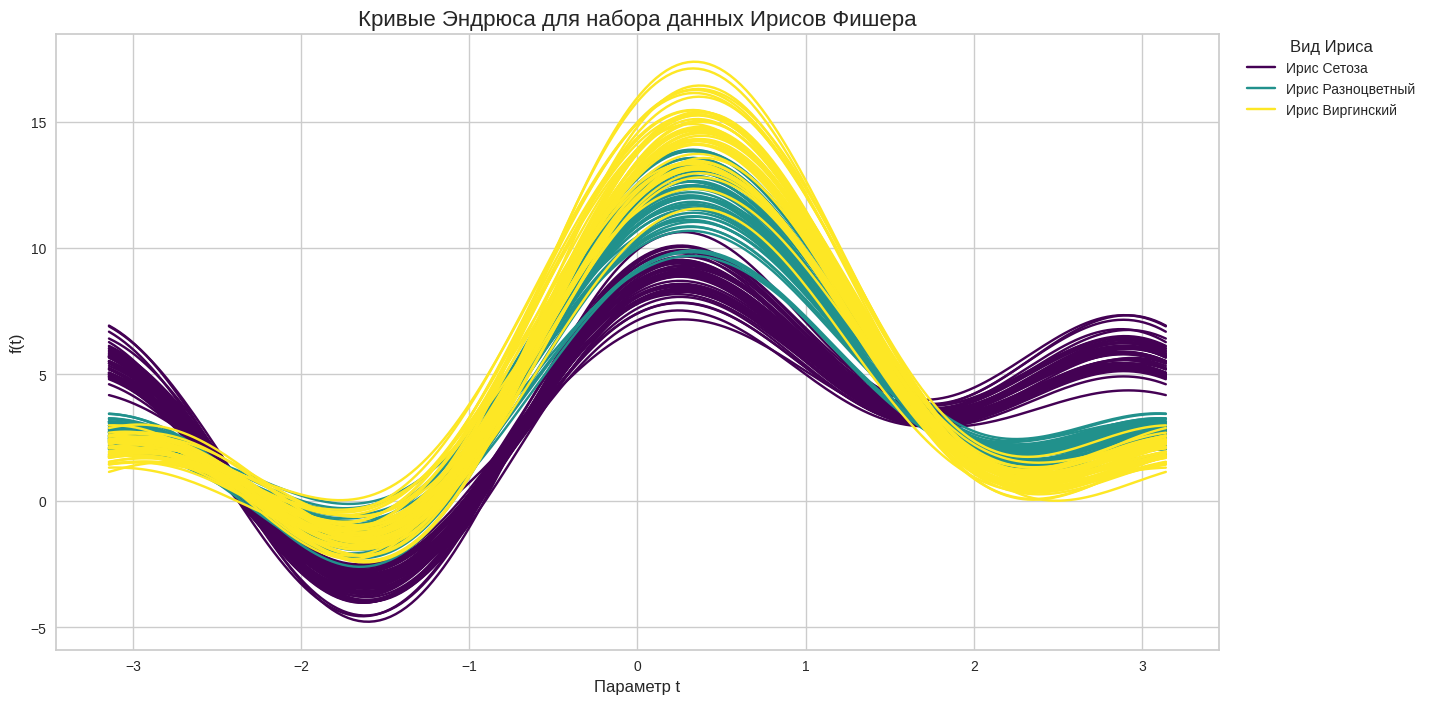

Кривые Эндрюса для набора данных Ирисов успешно отображены.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import andrews_curves

# Assuming df_iris and numerical_features_iris are already defined
# numerical_features_iris: ['Длина_чашелистика', 'Ширина_чашелистика', 'Длина_лепестка', 'Ширина_лепестка']
# species_name_map: {0: 'Ирис Сетоза', 1: 'Ирис Разноцветный', 2: 'Ирис Виргинский'}

# Prepare the DataFrame for Andrews curves, ensuring species_id is included for coloring
# We'll use the translated numerical features and the species_id
df_iris_andrews = df_iris[numerical_features_iris + ['species_id']].copy()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot Andrews curves
# Use 'species_id' as the class_column to color the curves by species
# Use a colormap that provides distinct colors for the three species
andrews_curves(df_iris_andrews,
               'species_id',
               ax=plt.gca(), # Get the current axes
               colormap='viridis' # A good colormap for distinguishing categories
              )

# Translate species labels for the legend
# This involves getting the handles and labels from the plot and mapping species_id to Russian names
handles, labels = plt.gca().get_legend_handles_labels()
# Map numerical labels (0, 1, 2) to Russian species names
new_labels = [species_name_map[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Вид Ириса', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Add Russian title and labels
plt.title('Кривые Эндрюса для набора данных Ирисов Фишера', fontsize=16)
plt.xlabel('Параметр t', fontsize=12)
plt.ylabel('f(t)', fontsize=12)

plt.grid(True)
plt.show()

print("Кривые Эндрюса для набора данных Ирисов успешно отображены.")